In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('commodities_12_22.csv', parse_dates=['Date'], index_col=0)
df.head()

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Date,,,,,,
2022-06-15,119.11,121.35,7.296,1814.8,21.090,4.1777
2022-06-14,118.93,121.17,7.189,1813.5,20.954,4.1565
2022-06-13,120.93,122.27,8.609,1831.8,21.255,4.2115
2022-06-10,120.67,122.01,8.850,1875.5,21.931,4.2945
2022-06-09,121.51,123.07,8.963,1852.8,21.817,4.3810


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3259 entries, 2022-06-15 to 2012-01-02
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Crude Oil    2734 non-null   float64
 1   Brent Oil    2701 non-null   float64
 2   Natural Gas  2733 non-null   float64
 3   Gold         2742 non-null   float64
 4   Silver       3256 non-null   float64
 5   Copper       2686 non-null   float64
dtypes: float64(6)
memory usage: 178.2 KB


In [3]:
daily_return = df.pct_change()
daily_return.head()

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Date,,,,,,
2022-06-15,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-14,-0.001511,-0.001483,-0.014666,-0.000716,-0.006449,-0.005075
2022-06-13,0.016817,0.009078,0.197524,0.010091,0.014365,0.013232
2022-06-10,-0.002150,-0.002126,0.027994,0.023856,0.031804,0.019708
2022-06-09,0.006961,0.008688,0.012768,-0.012103,-0.005198,0.020142


Convert daily price to monthly price by taking the commodities' price at the last trading day of the month

In [4]:
monthly_price = df.resample('1M').last()

In [5]:
monthly_price.head()

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Date,,,,,,
2012-01-31,98.48,110.98,2.503,1737.8,33.233,3.788
2012-02-29,107.07,122.66,2.616,1709.9,34.583,3.870
2012-03-31,103.02,122.88,2.126,1669.3,32.469,3.824
2012-04-30,104.87,119.47,2.285,1663.4,30.959,3.833
2012-05-31,86.53,101.87,2.422,1562.6,27.741,3.362


In [6]:
monthly_return = monthly_price.pct_change()
monthly_return.head()

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Date,,,,,,
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.087226,0.105244,0.045146,-0.016055,0.040622,0.021647
2012-03-31,-0.037826,0.001794,-0.187309,-0.023744,-0.061128,-0.011886
2012-04-30,0.017958,-0.027751,0.074788,-0.003534,-0.046506,0.002354
2012-05-31,-0.174883,-0.147317,0.059956,-0.060599,-0.103944,-0.122880


Drop NaN value since we cannot have the return for the first period

In [7]:
monthly_return = monthly_return.dropna()

## 1. Calculate the standard deviation and the mean of the monthly return

In [8]:
monthly_return.std()

Crude Oil      0.078050
Brent Oil      0.106970
Natural Gas    0.128509
Gold           0.044721
Silver         0.079931
Copper         0.054059
dtype: float64

**Natural Gas** has the highest monthly return volatility at around **12.85%** while **Gold** has the lowest monthly return volatility at about **4.47%**

In [9]:
monthly_return.mean()

Crude Oil      0.004564
Brent Oil      0.007050
Natural Gas    0.016486
Gold           0.001328
Silver        -0.000579
Copper         0.002225
dtype: float64

## 2. Calculate the annualized volatility and annualized return for commodities

In [10]:
annualize_vol = monthly_return.std()*np.sqrt(12)

In [11]:
annualize_vol

Crude Oil      0.270372
Brent Oil      0.370554
Natural Gas    0.445168
Gold           0.154919
Silver         0.276888
Copper         0.187267
dtype: float64

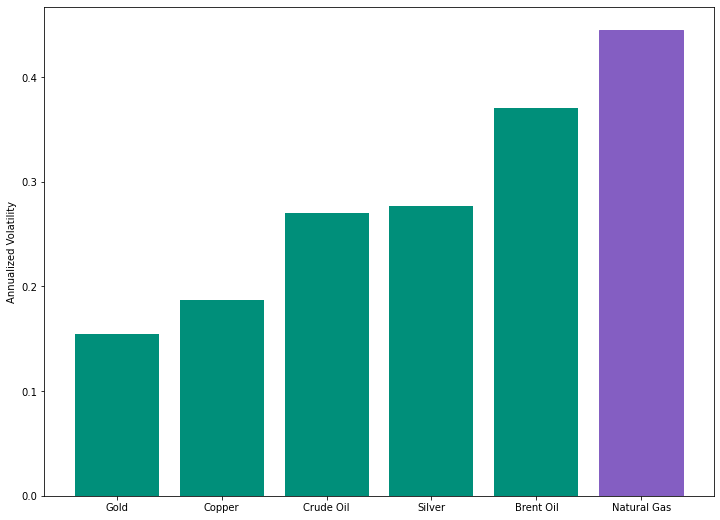

In [12]:
plt.figure(figsize=(12,9))
plt.ylabel('Annualized Volatility')
annualize_vol.sort_values(inplace=True)
ann_vol_chart = plt.bar(x=annualize_vol.index, height=annualize_vol, color='#008F7A')
ann_vol_chart[-1].set_color('#845EC2')

Natural gas has the highest annualized volatility while gold has the lowest

In [13]:
n_months = monthly_return.shape[0]
return_per_month = (monthly_return+1).prod()**(1/n_months)-1
return_per_month

Crude Oil      0.001523
Brent Oil      0.000715
Natural Gas    0.008595
Gold           0.000347
Silver        -0.003631
Copper         0.000784
dtype: float64

In [14]:
annualize_return = (return_per_month+1)**12-1
annualize_return

Crude Oil      0.018426
Brent Oil      0.008612
Natural Gas    0.108164
Gold           0.004171
Silver        -0.042716
Copper         0.009445
dtype: float64

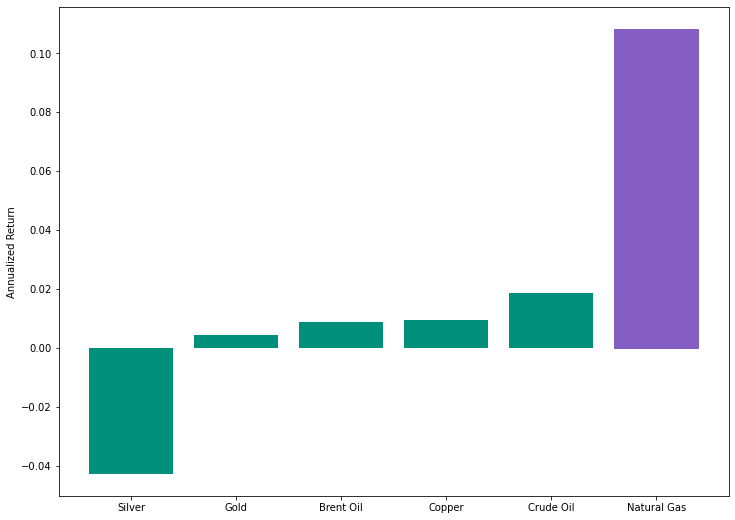

In [15]:
plt.figure(figsize=(12,9))
plt.ylabel('Annualized Return')
annualize_return.sort_values(inplace=True)
ann_ret_chart = plt.bar(x=annualize_return.index, height=annualize_return, color='#008F7A')
ann_ret_chart[-1].set_color('#845EC2')

Natural gas has the highest annualized return despite the high risk while silver witness a negative return and a high volatility

## 3. Calcualte the Sharpe Ratio of different commodities

In [16]:
risk_free_rate = 0.03 #assume the risk free rate is 3%
excess_return = annualize_return-risk_free_rate
sharpe_ratio = excess_return/annualize_vol

In [17]:
sharpe_ratio

Brent Oil     -0.057718
Copper        -0.109763
Crude Oil     -0.042806
Gold          -0.166727
Natural Gas    0.175582
Silver        -0.262620
dtype: float64

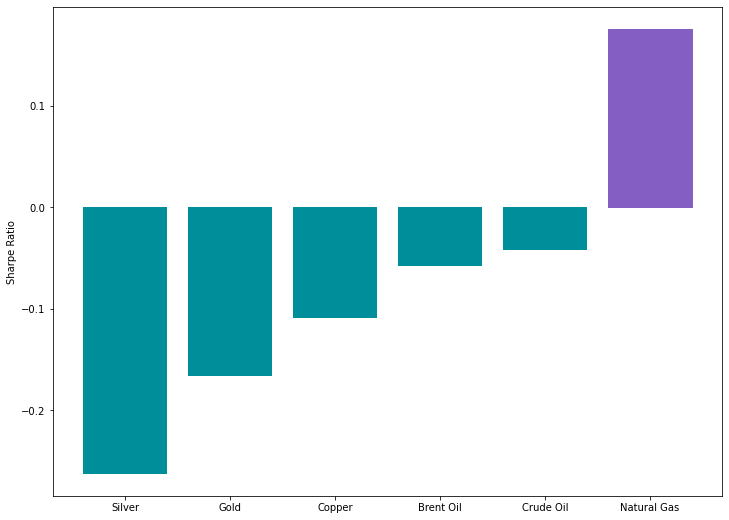

In [18]:
plt.figure(figsize=(12,9))
plt.ylabel('Sharpe Ratio')
sharpe_ratio.sort_values(inplace=True)
sp_chart = plt.bar(x=sharpe_ratio.index, height=sharpe_ratio, color='#008E9B')
sp_chart[5].set_color('#845EC2')

Except for natural gas, all of the commodities have negative Sharpe Ratio which means that the investment in these commodities are not efficient as buying Treasury bond

## 4. Calculate the correlation between the return of different commodities

In [19]:
df_corr = monthly_return.corr()

In [20]:
df_corr

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Crude Oil,1.000000,0.769729,0.134064,0.092220,0.229790,0.472504
Brent Oil,0.769729,1.000000,0.070463,0.061712,0.319525,0.481226
Natural Gas,0.134064,0.070463,1.000000,-0.089082,-0.034100,0.027913
Gold,0.092220,0.061712,-0.089082,1.000000,0.665266,0.252299
Silver,0.229790,0.319525,-0.034100,0.665266,1.000000,0.368483
Copper,0.472504,0.481226,0.027913,0.252299,0.368483,1.000000


Text(87.0, 0.5, "Commodities' return")

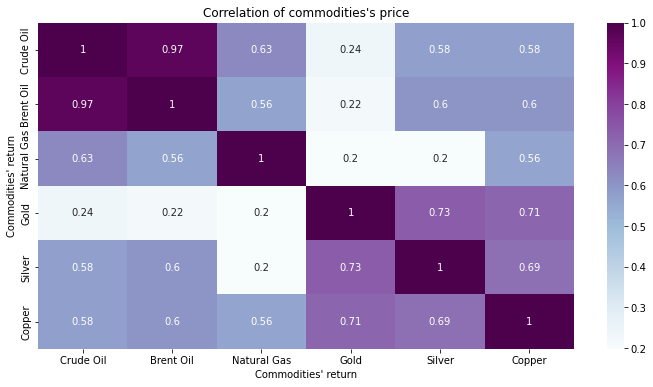

In [21]:
plt.figure(figsize=(12,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title("Correlation of commodities's price")
plt.xlabel("Commodities' return")
plt.ylabel("Commodities' return")

* The correlation between metal such as gold, silver and copper are high
* Oil and gas investment returns are also highly correlated
* Gold and oil or gas returns have low correlation which could be a good option for investors who prefer diversification and low risk